In [1]:
import random
import itertools

In [2]:
def Prange(H, s, w):
    m, n = H.dimensions()
    assert(0 <= w <= n)
    assert(s.length() == m) # m == n - k
    
    k = n - m
    f = H.base_ring()
    
    while True:
        I = random.sample(range(0, n), k)
        J = tuple(set(range(0, n)) - set(I))
        H_J = H[:, J]
        
        try:
            s_ = H_J.inverse() * s
        except ZeroDivisionError:
            continue
            
        if s_.hamming_weight() <= w:
            e = zero_vector(f, n)
            for i, j in zip(range(n - k), J):
                e[j] = s_[i]
            return e

In [135]:
import sage.coding
C = codes.HammingCode(GF(3^3), 3)

H = C.parity_check_matrix()

In [136]:
%%time
Prange(H, vector([1,1,1]), 3)

CPU times: user 1.05 ms, sys: 0 ns, total: 1.05 ms
Wall time: 1.06 ms


(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, z3^2 + z3 + 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

0.31464691417837226


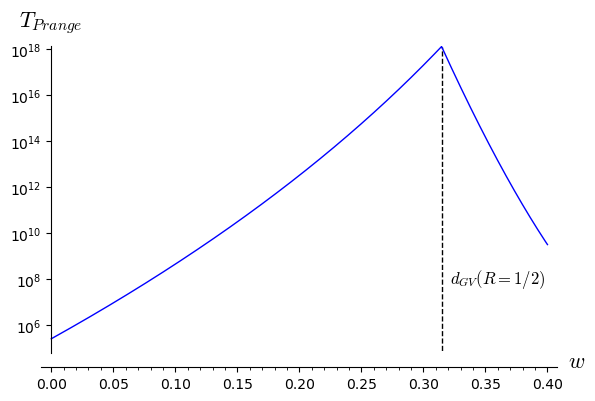

In [143]:
from sage.coding.code_bounds import entropy, entropy_inverse
#import pylab as plt

q = 3^3
R = 1/2
n=100  # Augmenter n ne change pas le profil de la fonction f
k = n / 2 # exemple de dimension
prange = lambda w: n * (n-k)^2 * q^(n * (min(entropy(w, q), 1-R) - (1-R)*entropy(w/(1-R), q)))

dGV = lambda R: entropy_inverse(1-R, q)
print(dGV(R))

P = line([(dGV(R),0),(dGV(R),prange(dGV(R)))], color='black', linestyle="--")
P += plot(prange, (0, .4))
P += text("$d_{GV}(R=1/2)$", (dGV(R)+.045, 10^8), fontsize=12, color='black')
# P.set_axes_range(ymin=0)
P.axes_labels(['$w$', '$T_{Prange}$'])


# w = omega * n => w/n=omega donc omega tend vers 0 quand n tend vers l'infini
P.show(scale='semilogy')

In [376]:
P.save("prange.pdf",scale='semilogy')

In [3]:
# p = 2
def Lee_Brickell(H, s, w):
    m, n = H.dimensions()
    assert(0 <= w <= n)
    assert(s.length() == m) # m == n - k
    
    k = n - m
    f = H.base_ring()
    
    while True:
        I = random.sample(range(0, n), k)
        J = tuple(set(range(0, n)) - set(I))
        H_I = H[:, I]
        H_J = H[:, J]
        
        try:
            H_J_inv = H_J.inverse()
        except ZeroDivisionError:
            continue
            
        s_ = H_J_inv * s
        for i1, i2 in itertools.product(range(0, k), range(0, k)):
            if i1 != i2:
                x = zero_vector(f, k)
                for e1, e2 in f^2:
                    x[i1] = e1
                    x[i2] = e2
                    y = s_ - H_J_inv * H_I * x
                        
                    if y.hamming_weight() <= w - 2:
                        e = zero_vector(f, n)
                        for i, j in zip(range(k), I):
                            e[j] = x[i]
                        for i, j in zip(range(n - k), J):
                            e[j] = y[i]
                        return e

In [404]:
import sage.coding
C = codes.HammingCode(GF(3^2), 3)

H = C.parity_check_matrix()

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [137]:
%%time
Lee_Brickell(H, vector([1,1,1]), 3)

CPU times: user 1.56 s, sys: 1.86 ms, total: 1.56 s
Wall time: 1.57 s


(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, z3^2 + z3 + 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [156]:
f(x,y) = x*y + sin(x^2) + e^(-x)
print(derivative(f, x))

(x, y) |--> 2*x*cos(x^2) + y - e^(-x)


In [362]:
q = 2^8
R = 1/2
n=1000  # Augmenter n ne change pas le profil de la fonction f
f(w, p) = (entropy(2*(w-p)/n, q))
w = 10
f1(p) = (entropy(2*(w-p)/n, q))
print(f1)
#print(derivative(f, w))
#print(derivative(f(w,p)))
#print(derivative(derivative(f(w,p))))
d1=derivative(f(w,p))
d2=derivative(d1)
#print(float(f1(2)))
find_local_maximum(f1, 1, 10)

p |--> -1/4000*(p - 10)*log(255)/log(2) - 1/4000*(p + 490)*log(1/500*p + 49/50)/log(2) + 1/4000*(p - 10)*log(-1/500*p + 1/50)/log(2)


(0.03424465086998091, 1.000000039331173)

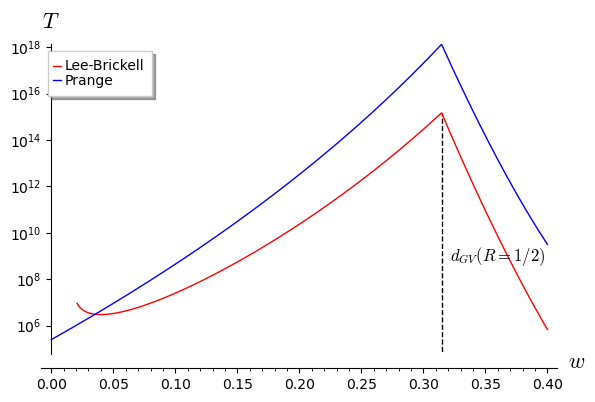

In [144]:
q = 3^3
R = 1/2
n=100  # Augmenter n ne change pas le profil de la fonction f
k = n / 2 # exemple de dimension
p=2.
lee_brickell = lambda w:  q^(n * (min(entropy(w, q), 1-R) - (1-R)*entropy((w-p/n)/(1-R), q)))

P_LB = line([(dGV(R),0),(dGV(R),lee_brickell(dGV(R)))], color='black', linestyle="--")
P_LB += plot(lee_brickell, (0, .4), color='red', legend_label='Lee-Brickell')
P_LB += plot(prange, (0, .4),legend_label='Prange')
P_LB += text("$d_{GV}(R=1/2)$", (dGV(R)+.045, 10^9), fontsize=12, color='black')
# P.set_axes_range(ymin=0)
P_LB.axes_labels(['$w$', '$T$'])
P_LB.legend(True)

# w = omega * n => w/n=omega donc omega tend vers 0 quand n tend vers l'infini
P_LB.show(scale='semilogy')

In [377]:
P_LB.save("LB.pdf",scale='semilogy')

In [152]:
def vector_subset(v, L):
    return vector([v[i] for i in L])

def vector_nonzero_ith_component(d, i, e, f):
    x = zero_vector(f, d)
    x[i] = e
    return x

# p = 2
def Stern(H, s, w, l):
    m, n = H.dimensions()
    assert(0 <= w <= n)
    assert(s.length() == m) # m == n - k
    assert(0 <= l <= m)
    
    k = n - m
    f = H.base_ring()
    X1 = [vector_nonzero_ith_component(k // 2, i, e, f) for i in range(k // 2) for e in f]
    
    while True:
        I = random.sample(range(0, n), k)
        J = tuple(set(range(0, n)) - set(I))
        H_I = H[:, I]
        H_J = H[:, J]
        
        try:
            H_J_inv = H_J.inverse()
        except ZeroDivisionError:
            continue
            
        s_ = H_J_inv * s
        A_ = H_J_inv * H_I
        L = random.sample(range(0, n - k), l)
        A1 = A_[range(n - k - l, n - k), range(0, k // 2)]
        A2 = A_[range(n - k - l, n - k), range(k // 2, k)]

        L1, L2 = dict(), dict() 
        for x in X1:
            L1[vector(vector_subset(s_, L) - A1 * x, immutable=True)] = x
            L2[vector(A2 * x, immutable=True)] = x
        # plus lent (deux itérations de X1) lorsque l'on prend un corps fini de grand cardinal (et/ou que la dimension du code est grand)
        # L1 = {vector(vector_subset(s_, L) - A1 * x, immutable=True) : x for x in X1}
        # L2 = {vector(A2 * x, immutable=True) : x for x in X1}
        
        for v, x1 in L1.items():
            x2 = L2.get(v)
            if x2 is not None:
                x = vector(list(x1) + list(x2))
                y = s_ - A_ * x
                e = zero_vector(f, n)
                for i, j in zip(range(k), I):
                    e[j] = x[i]
                for i, j in zip(range(n - k), J):
                    e[j] = y[i]
                if e.hamming_weight() <= w:
                    return e

In [129]:
import sage.coding
C = codes.HammingCode(GF(3^3), 3)

H = C.parity_check_matrix()

In [153]:
%%time
Stern(H, vector([2,0,0]), 10, 2)

CPU times: user 7.83 s, sys: 3.89 ms, total: 7.83 s
Wall time: 7.86 s


(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, z3^2 + 2*z3, 0, 0, 0, z3^2 + 2*z3 + 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 11 points.
verbose 0 (3839: plot.py, generate_plot_points) Last error message: 'The entropy function is defined only for x in the interval [0, 1]'
verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 11 points.
verbose 0 (3839: plot.py, generate_plot_points) Last error message: 'The entropy function is defined only for x in the interval [0, 1]'


/usr/lib64/python3.10/site-packages/sage/plot/graphics.py:2852: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  subplot.set_ylim([ymin, ymax])


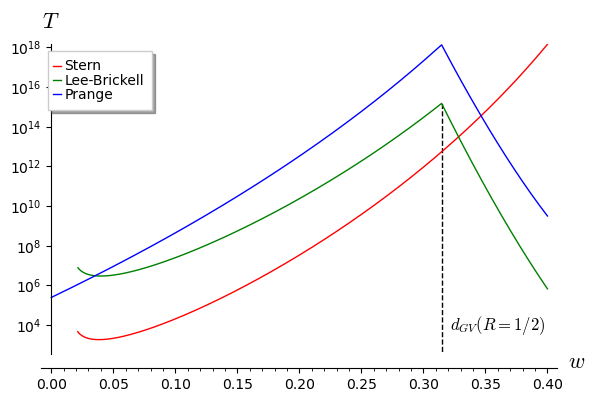

In [150]:
q = 3^3
R = 1/2
n=100  # Augmenter n ne change pas le profil de la fonction f
k = n / 2 # exemple de dimension
p=2.
l=2.
stern = lambda w: q^(n * (entropy(w, q) - (R/2)*entropy((p/n)/R, q) - (1-R-l/n) * entropy((w-p/n)/(1-R-(l/n)), q)))

P_S = line([(dGV(R),0),(dGV(R),lee_brickell(dGV(R)))], color='black', linestyle="--")
P_S += plot(stern, (0, .4), color='red', legend_label='Stern')
P_S += plot(lee_brickell, (0, .4), color='green', legend_label='Lee-Brickell')
P_S += plot(prange, (0, .4),legend_label='Prange')
P_S += text("$d_{GV}(R=1/2)$", (dGV(R)+.045, 10^4), fontsize=12, color='black')
# P.set_axes_range(ymin=0)
P_S.axes_labels(['$w$', '$T$'])
P_S.legend(True)

# w = omega * n => w/n=omega donc omega tend vers 0 quand n tend vers l'infini
P_S.show(scale='semilogy')

In [151]:
P_S.save("Stern.pdf",scale='semilogy')